# Simple Parameter Study: 2-D Model Grid

Often we want to study how the 21-cm signal changes over a range of parameters. We can do so using the ModelGrid class, and use numpy arrays to represent the range of values we’re interested in.

Before we start, the few usual imports:

In [1]:
%pylab inline
import ares
import numpy as np
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


## Efficient Example: :math:`tanh` model for the global 21-cm signal

Before we run a set of models, we need to decide what quantities we’d like to save. For a detailed description of how to do this in general cases, check out :doc:`example_inline_analysis`.

For now, let’s save the redshift and brightness temperature of the global 21-cm emission maximum, which we dub "Turning Point D", and the CMB optical depth,


In [2]:
blobs_scalar = ['z_D', 'dTb_D', 'tau_e']

in addition to the ionization, thermal, and global 21-cm histories at redshifts between 5 and 20 (at $\Delta z = 1$ increments),

In [3]:
blobs_1d = ['cgm_h_2', 'igm_Tk', 'dTb']
blobs_1d_z = np.arange(5, 21)

**NOTE:** For a complete listing of ideas for 1-D blobs see the [Fields Listing](../fields.html).

Now, we’ll make a dictionary full of parameters that will get passed to every global 21-cm signal calculation. In addition to the blobs, we’ll set ``tanh_model=True`` to speed things up (see next section regarding physical models), and ``problem_type=101``:    

In [4]:
base_pars = \
{
 'problem_type': 101,
 'tanh_model': True,
 'blob_names': [blobs_scalar, blobs_1d],
 'blob_ivars': [None, [('z', blobs_1d_z)]],
 'blob_funcs': None,
}

and create the ``ModelGrid`` instance,   

In [5]:
mg = ares.inference.ModelGrid(**base_pars)

At this point we have yet to specify which parameters will define the axes of the model grid. Since we set ``tanh_model=True``, we have 9 parameters to choose from: a step height, step width, and step redshift for the Ly-$\alpha$, thermal, and ionization histories:

* Ly-$\alpha$ history parameters: ``tanh_J0``, ``tanh_Jz0``, ``tanh_Jdz``.
* Thermal history parameters: ``tanh_T0``, ``tanh_Tz0``, ``tanh_Tdz``.
* Ionization history parameters: ``tanh_x0``, ``tanh_xz0``, ``tanh_xdz``.

The Ly-$\alpha$ step height, ``tanh_J0``, must be provided in units of $J_{21} = 10^{-21} \mathrm{erg} \ \mathrm{s}^{-1} \ \mathrm{cm}^{-2} \ \mathrm{Hz}^{-1} \ \mathrm{sr}^{-1}$, while the temperature step height is assumed to be in Kelvin. The ionization step height should not exceed unity -- in fact it's safe to assume ``tanh_x0=1`` (we know that reionization *ends*!). See [Harker et al. (2016)]( <http://adsabs.harvard.edu/abs/2016MNRAS.455.3829H>) for more information about the *tanh* model.

Let’s take the reionization redshift, ``tanh_xz0``, and duration, ``tanh_xdz``, and sample them over a reasonable redshift interval with a spacing of $\Delta z = 0.2$,

In [6]:
z0 = np.arange(6, 12.2, 0.2)
dz = np.arange(0.2, 8.2, 0.2)

Now, we just set the ``axes`` attribute to a dictionary containing the array of values for each parameter:

In [7]:
mg.axes = {'tanh_xz0': z0, 'tanh_xdz': dz}

To run,

In [8]:
mg.run('test_2d_grid', clobber=True, save_freq=100)

grid: N/A% |                                                                                  | ETA:  --:--:-- 

Starting 1240-element model grid.
Running 1240-element model grid.


grid:   8% |######                                                                            | ETA:   0:02:28 

Checkpoint #1: Thu Aug 26 18:31:34 2021


grid:  16% |#############                                                                     | ETA:   0:02:13 

Checkpoint #2: Thu Aug 26 18:31:47 2021


grid:  24% |###################                                                               | ETA:   0:01:59 

Checkpoint #3: Thu Aug 26 18:31:59 2021


grid:  32% |##########################                                                        | ETA:   0:01:47 

Checkpoint #4: Thu Aug 26 18:32:12 2021


grid:  40% |#################################                                                 | ETA:   0:01:34 

Checkpoint #5: Thu Aug 26 18:32:25 2021


grid:  48% |#######################################                                           | ETA:   0:01:21 

Checkpoint #6: Thu Aug 26 18:32:38 2021


grid:  56% |##############################################                                    | ETA:   0:01:09 

Checkpoint #7: Thu Aug 26 18:32:51 2021


grid:  64% |####################################################                              | ETA:   0:00:56 

Checkpoint #8: Thu Aug 26 18:33:04 2021


grid:  72% |###########################################################                       | ETA:   0:00:43 

Checkpoint #9: Thu Aug 26 18:33:17 2021


grid:  80% |##################################################################                | ETA:   0:00:30 

Checkpoint #10: Thu Aug 26 18:33:30 2021


grid:  88% |########################################################################          | ETA:   0:00:17 

Checkpoint #11: Thu Aug 26 18:33:43 2021


grid:  96% |###############################################################################   | ETA:   0:00:05 

Checkpoint #12: Thu Aug 26 18:33:56 2021


grid: 100% |##################################################################################| Time:  0:02:39 


Processor 0: Wrote test_2d_grid.*.pkl (Thu Aug 26 18:34:01 2021)
Calculation complete: Thu Aug 26 18:34:01 2021
Elapsed time (min)  : 2.66


To speed things up, you could increase the grid spacing. Or, execute the above in parallel as a Python script (assuming you have MPI and mpi4py installed).

**NOTE:** If the model grid doesn’t finish running, that’s OK! Simply re-execute the above command with ``restart=True`` as an additional keyword argument and it will pick up where it left off.

To analyze the results, create an analysis instance,    

In [9]:
anl = ares.analysis.ModelSet('test_2d_grid')


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_2d_grid                                                                           ####
#### N-d         : 2                                                                                      ####


and, for example, plot the 2-d parameter space with points color-coded by ``tau_e``,

# Loaded test_2d_grid.000.blob_0d.tau_e.pkl


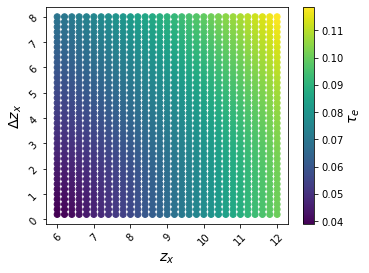

In [10]:
ax1 = anl.Scatter(anl.parameters, c='tau_e', fig=1)

or instead, the position of the emission maximum with the same color coding:

# Loaded test_2d_grid.000.blob_0d.z_D.pkl
# Loaded test_2d_grid.000.blob_0d.dTb_D.pkl


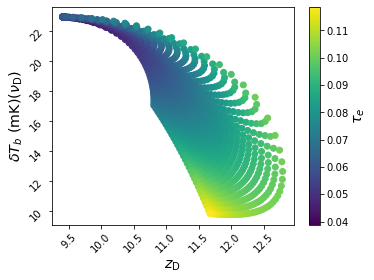

In [11]:
ax2 = anl.Scatter(['z_D', 'dTb_D'], c='tau_e', fig=2)

**NOTE:** In general, you may want to save ``'z_C'`` and ``'dTb_C'``, i.e., the location of the global 21-cm absorption feature. But, in this case since we've only varied parameters of the ionization history, that point will not change and so saving it as a blob is unnecessary. 
    
See :doc:`example_grid_analysis` for more information.

## Accessing the Data Directly

If you'd like to access the data directly for further manipulation, you'll be looking at the following attributes of the ``ModelSet`` class:

* ``chain``, which is a 2-D array with dimensions (number of models, number dimensions).
* ``get_blob``, which is a function that can be used to read-in blobs from disk.

**NOTE:** The ``chain`` attribute is referred to as such because is analogous to an MCMC chain, but rather than random samples of the posterior distribution, it represents "samples" on a structured mesh.

For example, to retrieve the samples of the ``test_2d_grid`` dataset above, you could do:

In [12]:
# Just the names of the axes
x, y = anl.parameters 
    
xdata, ydata = anl.chain[:,0], anl.chain[:,1]

or equivalently,

In [13]:
xdata, ydata = anl.chain.T

And to plot the samples,

Text(0, 0.5, 'tanh_xdz')

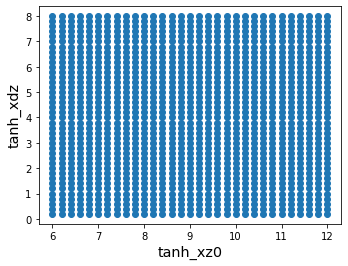

In [14]:
pl.scatter(xdata, ydata)
pl.xlabel(x)
pl.ylabel(y)

To extract blobs, you could do

In [15]:
QHII = anl.get_blob('cgm_h_2')
print(QHII.shape)

# Loaded test_2d_grid.000.blob_1d.cgm_h_2.pkl
(1240, 16)


Notice that the first dimension of ``QHII`` is the same as the first dimension of ``chain`` -- just the number of samples in the ModelGrid. The second dimension, however, is different. Now, rather than representing the dimensionality of the parameter space, it represents the dimensionality of this particular blob. Why 16 elements? Because our blobs were setup such that the quantities ``cgm_h_2``, ``igm_Tk``, and ``dTb`` were recorded at all redshifts in ``np.arange(5, 21)``, which has 16 elements.

So, we could for example color-code the points in our previous plot by the volume-averaged ionization fraction at :math:`z=10` by doing:

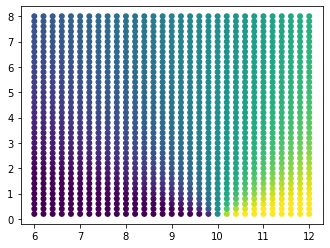

In [16]:
pl.scatter(xdata, ydata, c=QHII[:,5], edgecolors='none')

If you forget the properties of a blob, you can type

In [17]:
group, element, nd, shape = anl.blob_info('cgm_h_2')
print(group, element, nd, shape)

1 0 1 (16,)


which returns the index of blob group, index of the element within that group, dimensionality of the blob, and the shape of blob. This can be useful, for example, to automatically figure out the independent variables for a blob:

In [18]:
# Should be 10 (redshift of interest above)
anl.blob_ivars[group][element][5]

10

All of the built-in analysis routines are structured so that you don't have to think about these things on a regular basis if you don't want to!    

## More Expensive Models

Setting ``tanh_model=True`` sped things up considerably in the previous example. In general, you can run grids varying any *ARES* parameters you like, just know that physical models (i.e., those with ``tanh_model=False``) generally take a few seconds each, whereas the $tanh$ model takes much less than a second for one model.

For example, to repeat the previous exercise for a physical model, you could replace this commands:

In [19]:
z0 = np.arange(6, 12, 0.1)
dz = np.arange(0.1, 8.1, 0.1)
mg.axes = {'tanh_xz0': z0, 'tanh_xdz': dz}

with (for example)

In [20]:
fX = np.logspace(-1, 1, 21)
Tmin = np.logspace(3, 5, 21)
mg.axes = {'fX': z0, 'Tmin': dz}

In some cases -- e.g., when ``Tmin`` or ``pop_Tmin`` is an axis of the model grid -- load-balancing can be very advantageous. Just execute the following command before running the grid:

In [21]:
mg.LoadBalance(method=1, par='Tmin') # or 'pop_Tmin'

The ``method=1`` setting assigns all models with common ``Tmin`` values to the same processor. This helps because *ARES* knows that it need only generate lookup tables for $df_{\mathrm{coll}} / dz$ (which determines the star formation rate density in the simplest models; see [this example](example_gs_standard)) once per value of ``Tmin``, which means you save a little bit of runtime at the outset of each calculation.
    
There is also a ``method=2`` option for load balancing, which is advantageous if the runtime of individual models is strongly correlated with a given parameter. In this case, the models will be sorted such that each processor gets a (roughly) equal share of the models for each value of the input ``par``. It helps to imagine the grid points of our 2-D parameter space color-coded by processor ID number: the resulting image for ``method=2`` is simply the transpose of the image you'd get for ``method=1``.

If the edges of your parameter space correspond to rather extreme    
models you might find that the calculations grind to a halt. This can be a big problem because you'll end up with one or more processors spinning their wheels while the rest of the processors continue. One way of dealing with this is to set an "alarm" that will be tripped if the runtime of a particular model exceeds some user-defined value. For example, before running a model grid, you might set:

In [22]:
mg.timeout = 60  

to limit calculations to 60 seconds or less. Models that trip this alarm will be recorded in the ``*fail*.pkl`` files so that you can look back later and (hopefully) figure out why they took so long.

**NOTE:** This tends to happen because the ionization and/or heating rates are very large, which drives the time-step to very small values. However, in these circumstances the temperature and/or ionized fraction are typically exceedingly large, at which point the 21-cm signal is zero and need not be tracked any longer. As a result, terminating such calculations 
before completion rarely has an important impact on the results.

**WARNING:** This may not work on all operating systems for unknown reasons. Let me know if you get a mysterious crash when using the ``timeout`` feature.